# DATA DESCRIPTION

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status



PROBLEM STATEMENT :

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

So, from the problem statement and the Dataset we can understand that it is a "Classification problem". so we will be using some Classification algorithms to make our model and then use GRIDSEARCHCV for hypeparameter tuning and save the predicted model using pkl.

# Importing the needed Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# DATA PREPARATION/Loading the Data 

In [55]:
df=pd.read_csv('loan_data.csv')

In [56]:
#Lets see the columns of the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.

In [57]:
#Loading the head of the Dataset to get a general view of the Data we will be working with.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


So by seeing the data we get a general understanding that some Data Cleaning is needed in the Dataset.

In [59]:
#Checking The Data Dimension
df.shape

(614, 13)

In [60]:
#Lets check for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

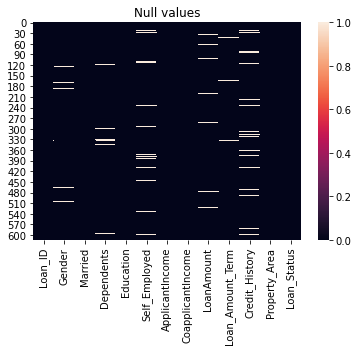

In [61]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

So many white lines, telling us the presence of many null values in the dataset.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


So from the above we can see that there are three types of values present in the dataset, i.e float64,int64 and object

In [63]:
#Lets get a general idea about the dataset by the describe method
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


So from both the tables above we can conclude that:
    
- There are null values in the dataset that we have to deal with.
- There also deems to be outliers for CoApplicant Income,Apllicant Income and Loan Amount.
- And some kind of skewness can also be seen from the description which we will see it more clearly later on.

# Now lets do some EDA on our dataset to understand our data better and find some correlation along the way

<AxesSubplot:xlabel='count', ylabel='Gender'>

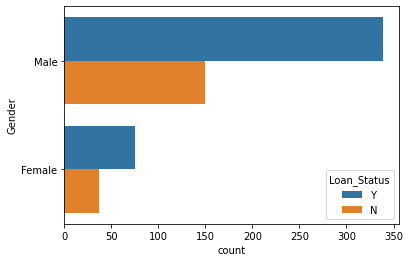

In [64]:
sns.countplot(y='Gender',hue='Loan_Status',data= df)

From the above we can conclude that More males are taking loans than that of females

<AxesSubplot:xlabel='count', ylabel='Married'>

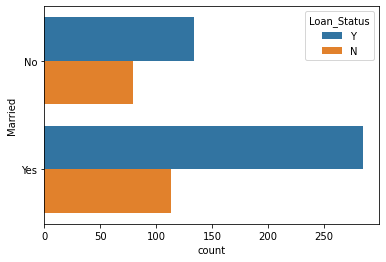

In [65]:
sns.countplot(y='Married',hue='Loan_Status',data = df)

From the above we can coclude that Married People collect more loans than unmarried

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

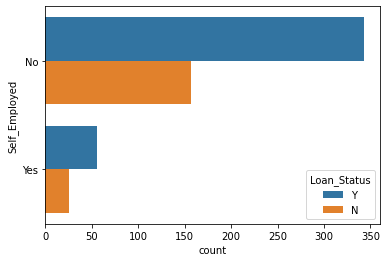

In [66]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data = df)

From the above we can see that self employed people take less loans as compared to salary earners

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

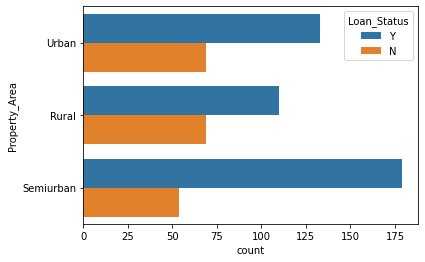

In [67]:
sns.countplot(y='Property_Area',hue='Loan_Status',data = df)

Semi-metropolitan gets more loan, trailed by Urban and afterward rural. This seems logical!

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

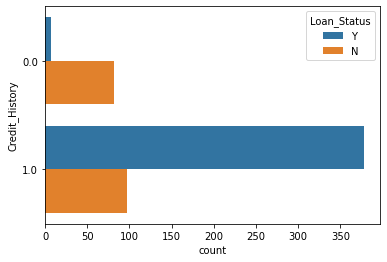

In [68]:
sns.countplot(y='Credit_History',hue='Loan_Status',data = df)

From the above we can refer that most of the people tend to pay back their loans.

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

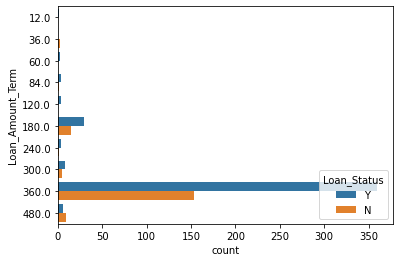

In [69]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data = df)

An amazingly high number of them go for a 360 cyclic credit term. That is repaid inside a year.

LETS SEE SOME VISUALIZATION FOR OUR ORDINAL VARIABLES:

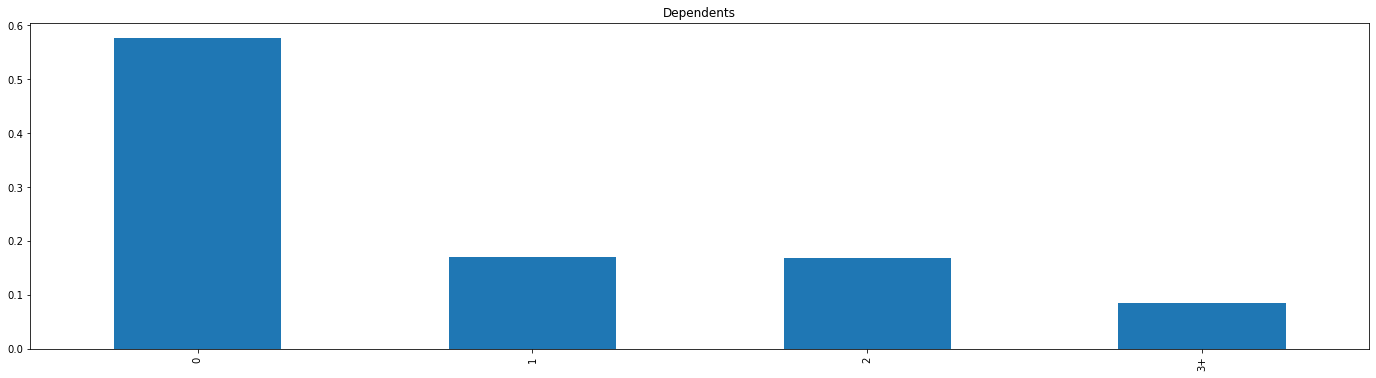

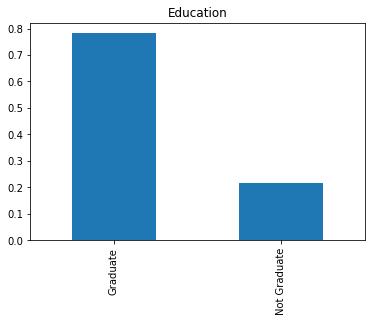

In [70]:
#For dependents column
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

#For Education columns
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()


The following deductions can be made using the above bar plots:
- Most of them do not have any dependents.
- Around 80% of the applicants are graduate.

LETS SEE SOME VISUALISATION FOR OUR NUMERICAL VARIABLES

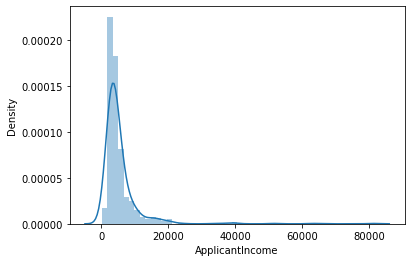

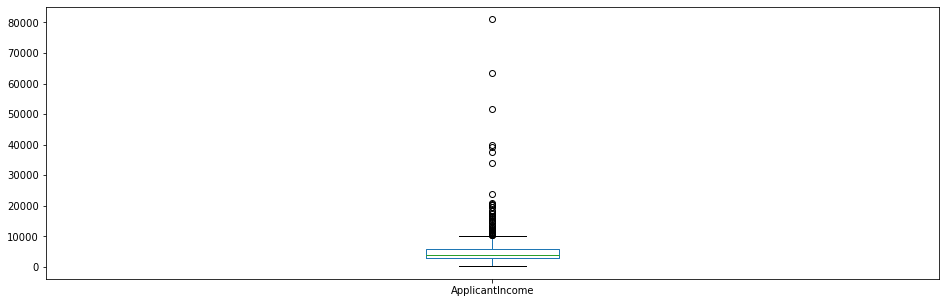

In [71]:
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

From the above graphs we can infer that most of the Data in the Distribution are left skewed which means it is not normally distributed.
The boxplot confirms that there are some outliers present in the Dataset.Maybe due to so much disparity in income levels.

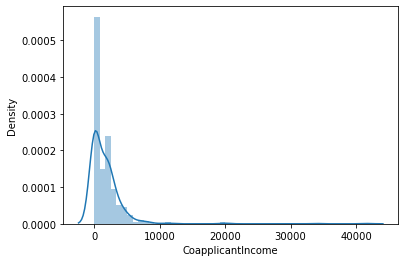

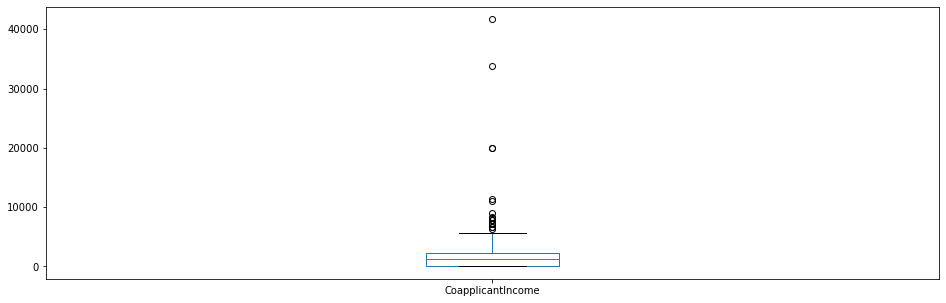

In [72]:
#Lets plot applicant income

sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. There are lot of outliers in the applicants income as it is not normally distributed.

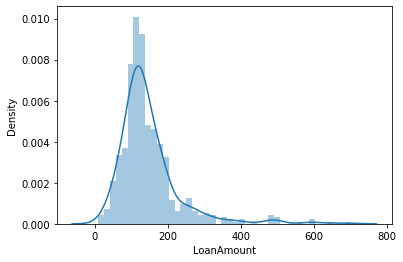

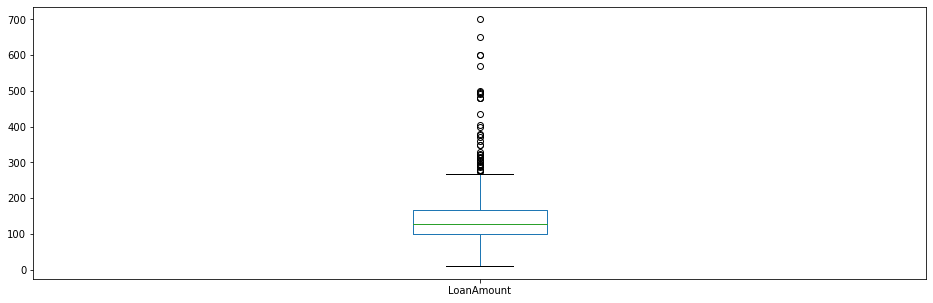

In [73]:
#Lets plot Coapplicant income

sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

There are lot of outliers in the dataset as the loan amount highly differs from person to person.But the distribution is fairly normal.

# DATA CLEANING

In [74]:
#fEATURE-WISE COUNT OF MISSING VALUES

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features one by one. We will be using the following methods for replacing the missing values:
- Numerical -- using mean or median
- Categorical -- using mode

In [75]:
#Filling missing values with mode

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [76]:
#Lets try and fill loan_amount_term by using value counts to see which variable is occuring more
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

From the above we can see that '360.0' is the most occuring value, so we will replace all the missing values in Loan_Amount_Term with '360'

In [77]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

Now lets look into the numerical variable LoanAmount. We will use median for this purpose as we saw it has many outliers so the mean approach will not bring significant results from our model.

In [78]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

let's check whether all the missing values are filled in the dataset.

In [79]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see from the above that all the null values have been replaced.

NOW LETS REMOVE THE OUTLIERS 

Due to outliers in the LoanAmount Data, bulk of the data is at the left and the right tail is longer. This is called right skewness.
We will be using log transformation to remove the skewness as it doesnot effect the smaller values but reduces the larger values so we get a normal distribution.

<AxesSubplot:>

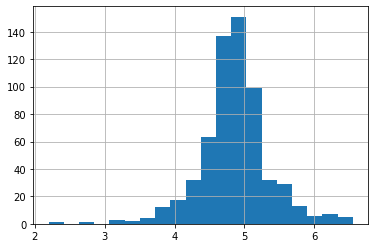

In [80]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

#Lets visualise it after log transformation
df['LoanAmount_log'].hist(bins=20)

Looks like we got ourselves a graph which is much closer to normal distribution.

NOW LETS ENCODE NUMERIC DATA 

In [81]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(7), object(2)
memory usage: 67.3+ KB


We can see from the above that Dependents is object we nee to change it to int64. We can also see that there is a duplicate column of loanamount as we have done a log transformation. Lets drop the Loan_id column and LoanAmount as we already have a duplicate.

In [89]:
#Dropping both the columns before proceeding

df.drop('Loan_ID', axis = 1, inplace = True)
df.drop('LoanAmount', axis = 1, inplace = True)

In [90]:
#Changing dependents object to int64
Dependents_ = pd.to_numeric(df.Dependents)

In [91]:
#dropping the old column
df.drop(['Dependents'], axis = 1, inplace = True)

In [92]:
#Adding the new through concat method
df = pd.concat([df, Dependents_], axis = 1)

In [93]:
#Now lets check again as we have changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   Loan_Amount_Term   614 non-null    float64
 7   Credit_History     614 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Loan_Status        614 non-null    int64  
 10  LoanAmount_log     614 non-null    float64
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


So, we have cleaned our data thorougly so that we can get a better prediction from our Models.

<AxesSubplot:>

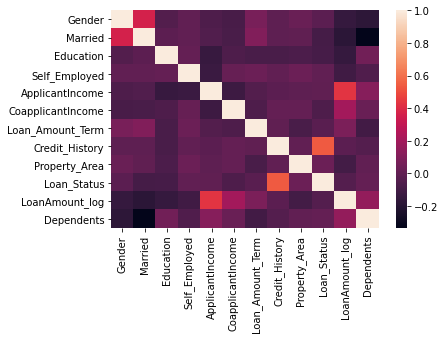

In [94]:
#Now lets check some correlation from the dataset
sns.heatmap(df.corr())

Showing the correlations of features with the target. No correlations are extremely high. The correlations between LoanAmount and ApplicantIncome is still seen.

# Separating independent variable and target variable

In [95]:
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# Finding The Best Random State

In [110]:
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(features_train,target_train)
    predrf=LR.predict(features_test)
    acc=accuracy_score(target_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,'on Random_State',maxRS)

Best Accuracy is 0.8432432432432433 on Random_State 39


# MODEL BUILDING

FIRST MODEL USING LOGISTIC REGRESSION

In [112]:
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
model = LogisticRegression()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.8486486486486486
[[ 27  27]
 [  1 130]]
              precision    recall  f1-score   support

           0       0.96      0.50      0.66        54
           1       0.83      0.99      0.90       131

    accuracy                           0.85       185
   macro avg       0.90      0.75      0.78       185
weighted avg       0.87      0.85      0.83       185

0.9027777777777779


In [113]:
print(test_pred)

[1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


SECOND MODEL USING RANDOM FOREST CLASSIFIER

In [120]:
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.8378378378378378
[[ 28  26]
 [  4 127]]
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        54
           1       0.83      0.97      0.89       131

    accuracy                           0.84       185
   macro avg       0.85      0.74      0.77       185
weighted avg       0.84      0.84      0.82       185

0.8943661971830985


In [115]:
print(test_pred)

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


THIRD MODEL USING DECISION TREE CLASSIFIER

In [178]:
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.6378378378378379
[[  8  46]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.28      0.15      0.19        54
           1       0.71      0.84      0.77       131

    accuracy                           0.64       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.58      0.64      0.60       185

0.7665505226480835


In [179]:
print(test_pred)

[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1]


FOURTH MODEL USING SVC

In [180]:
from sklearn.svm import SVC
target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
model = SVC()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.7081081081081081
[[  0  54]
 [  0 131]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.71      1.00      0.83       131

    accuracy                           0.71       185
   macro avg       0.35      0.50      0.41       185
weighted avg       0.50      0.71      0.59       185

0.829113924050633


In [181]:
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


FIFTH MODEL USING MULTINOMIALNB

In [182]:
from sklearn.naive_bayes import MultinomialNB

target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
model = MultinomialNB()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.4864864864864865
[[22 32]
 [63 68]]
              precision    recall  f1-score   support

           0       0.26      0.41      0.32        54
           1       0.68      0.52      0.59       131

    accuracy                           0.49       185
   macro avg       0.47      0.46      0.45       185
weighted avg       0.56      0.49      0.51       185

0.5887445887445887


In [183]:
print(test_pred)

[0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1]


SIXTH MODEL USING KNEIGHBORSCLASSIFIER

In [184]:
from sklearn.neighbors import KNeighborsClassifier

target =df['Loan_Status']
features = df.drop('Loan_Status', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=39)

#Create the model and train
model = KNeighborsClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
print(accuracy_score(y_test, test_pred))
print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))
print(f1_score(y_test, test_pred))


0.6378378378378379
[[  8  46]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.28      0.15      0.19        54
           1       0.71      0.84      0.77       131

    accuracy                           0.64       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.58      0.64      0.60       185

0.7665505226480835


In [185]:
print(test_pred)

[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1]


# CHECKING CROSS VALIDATION 

In [186]:
scr=cross_val_score(RandomForestClassifier(),features,target, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.7882447021191524


In [187]:

scr=cross_val_score(SVC(),features,target, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.6872984139677463


In [188]:
scr=cross_val_score(MultinomialNB(),features,target, cv=5)
print('Cross validation score of MultinomialNB model :',scr.mean())

Cross validation score of MultinomialNB model : 0.48535252565640413


In [189]:
scr=cross_val_score(DecisionTreeClassifier(),features,target, cv=5)
print('Cross validation score of DecisionTreeClassifier model :',scr.mean())

Cross validation score of DecisionTreeClassifier model : 0.726416100226576


In [190]:
scr=cross_val_score(KNeighborsClassifier(),features,target, cv=5)
print('Cross validation score of KNeighborsClassifier model :',scr.mean())

Cross validation score of KNeighborsClassifier model : 0.6156604025056645


In [191]:
scr=cross_val_score(LogisticRegression(),features,target, cv=5)
print('Cross validation score of LogisticRegression model :',scr.mean())

Cross validation score of LogisticRegression model : 0.8078368652538984


So, By cross checking our values with the accuracy score above, Decision Tree Classifier has the best difference in between cross validation scores and accuracy score.

# GridSearch CV Parameter Tuning

In [192]:
#creating parameters list to pass in GridSearchCv
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2,15),
              'criterion':['gini','entropy']}

In [193]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [194]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [195]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [196]:
GCV_pred=GCV.best_estimator_.predict(X_test)

In [197]:
accuracy_score(y_test,GCV_pred)

0.8378378378378378

# Saving Best Model Using PKl

In [198]:
import joblib
filename = 'Loan_model.pkl'
joblib.dump(GCV.best_estimator_, filename)

['Loan_model.pkl']

In [199]:
#Loading the model to see if it was uploaded perfectly

loaded_model = joblib.load('Loan_model.pkl')
pred=dtc.predict(X_test)
print(pred)

[1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
